In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('pima-data.csv')

In [3]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


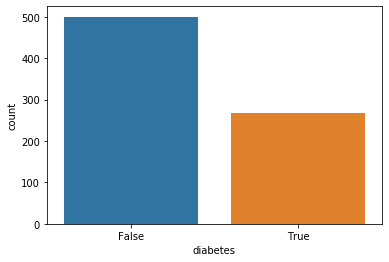

In [4]:
sns.countplot(x= 'diabetes', data= df)

In [5]:
map_data= {True:1, False: 0}

In [7]:
df['diabetes']= df['diabetes'].map(map_data)

In [8]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler= StandardScaler()

In [13]:
scaler.fit(df.drop('diabetes',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled_features= scaler.transform(df.drop('diabetes',axis=1))

In [15]:
df1 = pd.DataFrame(scaled_features, columns =df.columns[:-1])
df1.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,0.907270
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.530902
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,-1.288212
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.154533
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0.907270


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df.drop('diabetes',axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn= KNeighborsClassifier(n_neighbors=12)

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [51]:
pred = knn.predict(X_test)
knn.score(X_train,y_train)

0.7821011673151751

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       168
           1       0.69      0.43      0.53        86

    accuracy                           0.74       254
   macro avg       0.72      0.66      0.67       254
weighted avg       0.73      0.74      0.72       254



In [25]:
error_rate= []
for i in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_test!= pred_i))

Text(0, 0.5, 'Error Ratee')

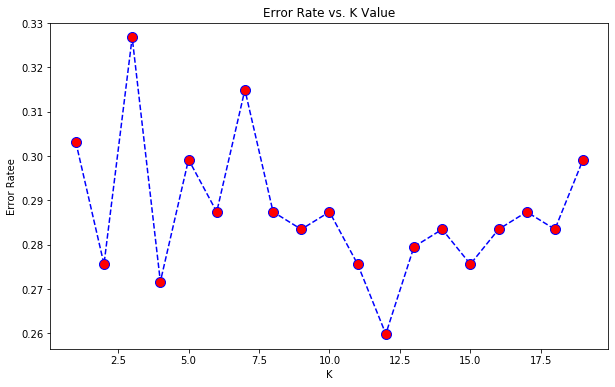

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Ratee')